#Assignment 5

In [169]:
# AS QUESTION 2 IS REPEATED SAME AS QUESTION 1

#Problem Statement 1 and 2:
 Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:
1. Create a seperate DataFrame with only numeric data by remove the "country" column
2. Scale the data using the Standard Scaler to create a scaled DataFrame
3. Plotting dendograms with the complete linkage method
4. Creating cluster labels using cut tree
5. Perform the 4-Component PCA on DataFrame
6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

Write Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:

In [170]:
!wget https://www.dropbox.com/s/025k5mqs1yw99qc/Country-data.csv

--2022-07-24 18:12:43--  https://www.dropbox.com/s/025k5mqs1yw99qc/Country-data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/025k5mqs1yw99qc/Country-data.csv [following]
--2022-07-24 18:12:44--  https://www.dropbox.com/s/raw/025k5mqs1yw99qc/Country-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccacf430728c23a2a98f0f0ccd1.dl.dropboxusercontent.com/cd/0/inline/BptElhC2mWnoraxaZtbf2Jih6aLKdPzVqPtZ7YP5yZY9DKTHzbx1mzJGtBINMBIF1w4ODoeK0p84V-UVAjWbyOIutHqhbcwSeXcQkQn8CtdYbQon6Zc-5EuvrQxU-xBErqmMZ-a7EgbPmBxWeZO-GoQiNdLN1Qbzd53lfW5caWWK0Q/file# [following]
--2022-07-24 18:12:44--  https://uccacf430728c23a2a98f0f0ccd1.dl.dropboxusercontent.com/cd/0/inline/BptElhC2mWnoraxaZtbf2Jih6aLKdPzVqPtZ7YP5yZY9DKTHzbx1mz

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
cntry_df=pd.read_csv("Country-data.csv") 
cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [173]:
cntry_df.shape

(167, 10)

In [174]:
cntry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


1.Create a seperate DataFrame with only numeric data by remove the "country" column

In [175]:
cntry_df1=cntry_df.drop(columns="country",axis=1)
cntry_df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


2.Scale the data using the Standard Scaler to create a scaled DataFrame

In [176]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(cntry_df1)
scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [177]:
cntry_df2=pd.DataFrame(scaled,columns=cntry_df1.columns)
cntry_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


3.Plotting dendograms with the complete linkage method

In [178]:
from scipy.cluster.hierarchy import dendrogram,linkage

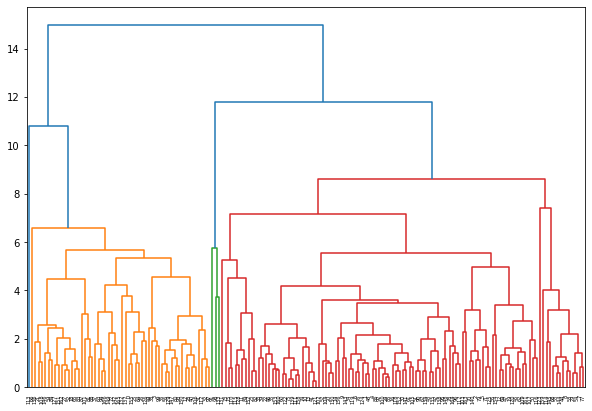

In [179]:
link=linkage(cntry_df2,method='complete')
plt.figure(figsize=(10,7))
dendrogram(link)
plt.show()

4.Creating cluster labels using cut tree

In [180]:
from scipy.cluster.hierarchy import cut_tree
cntry_df2["hierarchical_cluster_labels"]=cut_tree(link,n_clusters=4)
cntry_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


5.Perform the 4-Component PCA on DataFrame

In [181]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
df_pca=pca.fit_transform(cntry_df2)
df_pca

array([[-3.00698492e+00,  1.23167230e-01, -8.00469540e-01,
         9.25002724e-01],
       [ 4.80433282e-01, -5.99431563e-01, -1.97637108e-01,
        -1.20297566e+00],
       [-2.08720448e-01, -5.17000080e-01,  1.32612257e+00,
        -7.52684785e-01],
       [-3.00585267e+00,  1.65500144e+00,  1.46406257e+00,
         9.95353375e-01],
       [ 1.06870378e+00,  1.35366338e-01, -1.37515238e-01,
        -8.63858437e-01],
       [ 9.59443503e-02, -1.82187056e+00,  8.75171869e-01,
         2.61915308e-02],
       [-3.61040095e-02, -6.04509023e-01,  4.06762675e-01,
        -1.44411185e+00],
       [ 2.35837852e+00, -1.95730122e+00, -7.16859664e-02,
         1.17923185e+00],
       [ 2.97094568e+00, -6.81865586e-01, -7.18889346e-01,
         1.17182891e+00],
       [-1.12122026e-01, -4.50244218e-01,  9.44058788e-01,
        -3.69006047e-01],
       [ 1.29530351e+00, -6.36304784e-01, -5.22082285e-01,
         1.74778944e-02],
       [ 1.70391534e+00,  5.41295214e-01,  9.69555325e-01,
      

In [182]:
DF_PCA=pd.DataFrame(df_pca,columns=["PC1","PC2","PC3","PC4"])
DF_PCA["hierarchical_cluster_labels"]=cut_tree(link,n_clusters=4)
DF_PCA

,PC1,PC2,PC3,PC4,hierarchical_cluster_labels
0,-3.006985,0.123167,-0.800470,0.925003,0
1,0.480433,-0.599432,-0.197637,-1.202976,1
2,-0.208720,-0.517000,1.326123,-0.752685,1
3,-3.005853,1.655001,1.464063,0.995353,0
4,1.068704,0.135366,-0.137515,-0.863858,1
...,...,...,...,...,...
162,-0.936842,0.671210,-0.408857,-0.688011,0
163,-0.438866,-1.356516,3.148921,0.147918,1
164,0.545522,1.368126,0.001433,-1.157891,1
165,-1.965433,-0.132923,1.043466,0.191215,0


6.Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

[Text(0.5, 1.0, 'How Low GDP Rate Corresponds to the Child Mortaility Rate')]

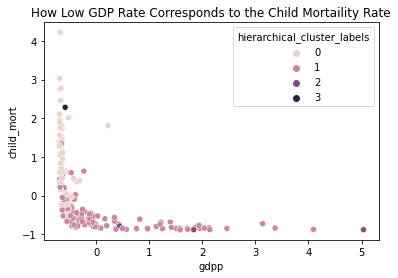

In [183]:
import seaborn as sns
sns.scatterplot( x='gdpp', y='child_mort', hue='hierarchical_cluster_labels', data=cntry_df2).set(title='How Low GDP Rate Corresponds to the Child Mortaility Rate')

# Problem Statement 3: 
Write a Python program that reads the “Credit Card Customer Data.csv”
(provided on LMS) The following are the tasks that need to be taken into consideration while
constructing the solution to Segregate customers based on the data provided with the help of kmeans clustering.
Tasks to be performed:
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best
size for the cluster and build the final model
8. Observe Cluster behavior with different columns
9. Print Co-ordinates of all centroids and silhouette scores for the final mode

1.Load the Given CSV file into a DataFrame

In [184]:
!wget https://www.dropbox.com/s/vyt1rotsbi78kbt/Credit%20Card%20Customer%20Data.csv

--2022-07-24 18:12:49--  https://www.dropbox.com/s/vyt1rotsbi78kbt/Credit%20Card%20Customer%20Data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vyt1rotsbi78kbt/Credit%20Card%20Customer%20Data.csv [following]
--2022-07-24 18:12:50--  https://www.dropbox.com/s/raw/vyt1rotsbi78kbt/Credit%20Card%20Customer%20Data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca50a02bbda7fe09d7250a7cdd1.dl.dropboxusercontent.com/cd/0/inline/BpsEfikZlo9ICZ5Dzg9IvYhdPhzCnCv4jwxCKFAeD_cmPzvM0w0PggZicqbVUofrqtkyxilNx4uclt4qHB9vYr42MMS9DP7pwGEnxQowx_o1y8zPZmywnQjNulTmF0XTf34GKRhTdG0yv1WIb-9iWzSY37bY7n24q0wTGpuogUTvOw/file# [following]
--2022-07-24 18:12:50--  https://uca50a02bbda7fe09d7250a7cdd1.dl.dropboxusercontent.com/cd/0/inli

In [185]:
data=pd.read_csv("Credit Card Customer Data.csv")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


2.Find missing values and drop the unnecessary columns

In [187]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [188]:
data.drop(columns=['Sl_No', 'Customer Key'],inplace=True) # drop unnecessory column

In [189]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


3.Univariate and bivariate analysis

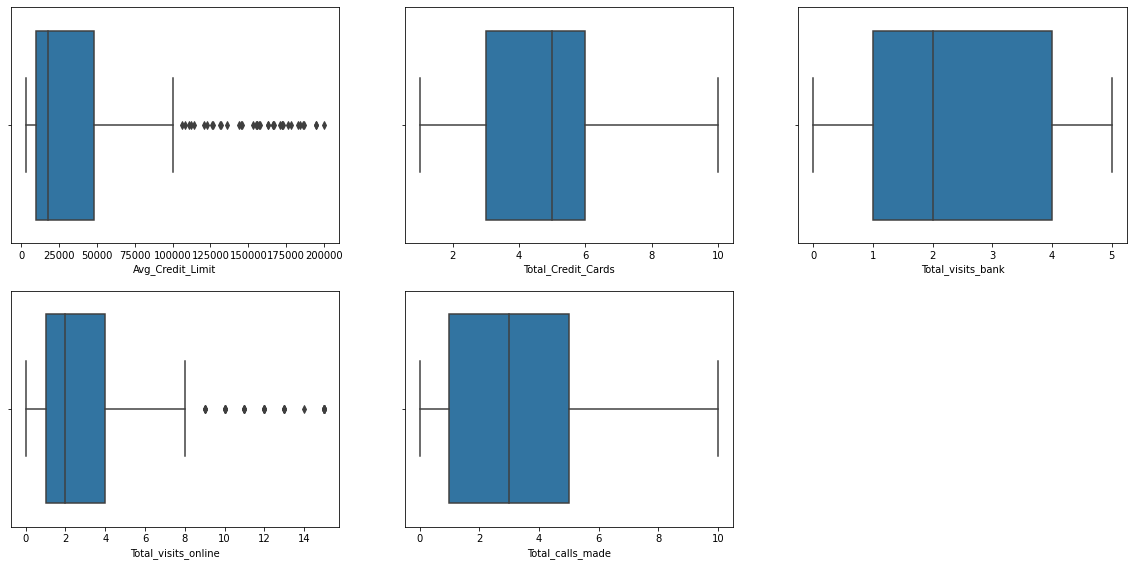

In [190]:
i=1
plt.figure(figsize=(20,20))
for j in data.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=data,x=j)
    i+=1

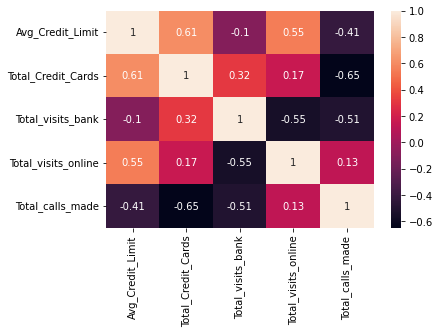

In [191]:
annot = True
sns.heatmap(data.corr(),annot=annot)
plt.show()

4.Standardize the whole dataset

In [192]:
sc=StandardScaler()# scaling of data
scaled=sc.fit_transform(data)
scaled_data=pd.DataFrame(scaled,columns=data.columns)

5.Find the within-cluster sum of square

In [193]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

6.Find silhouette score

In [194]:
from sklearn.metrics import silhouette_score
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(data)
    slh_score.append(silhouette_score(scaled_data,km.labels_))

7. Use a line plot using matplotlib to find scores for different sizes of K and choose the best
size for the cluster and build the final model

Text(0.5, 0, 'k-value')

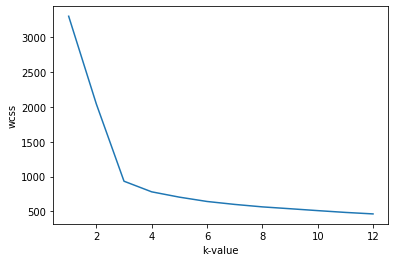

In [195]:
plt.plot(range(1,13),wcss)
plt.ylabel('wcss')
plt.xlabel('k-value')

8. Observe Cluster behavior with different columns

In [196]:
km1=KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
data['label']=y

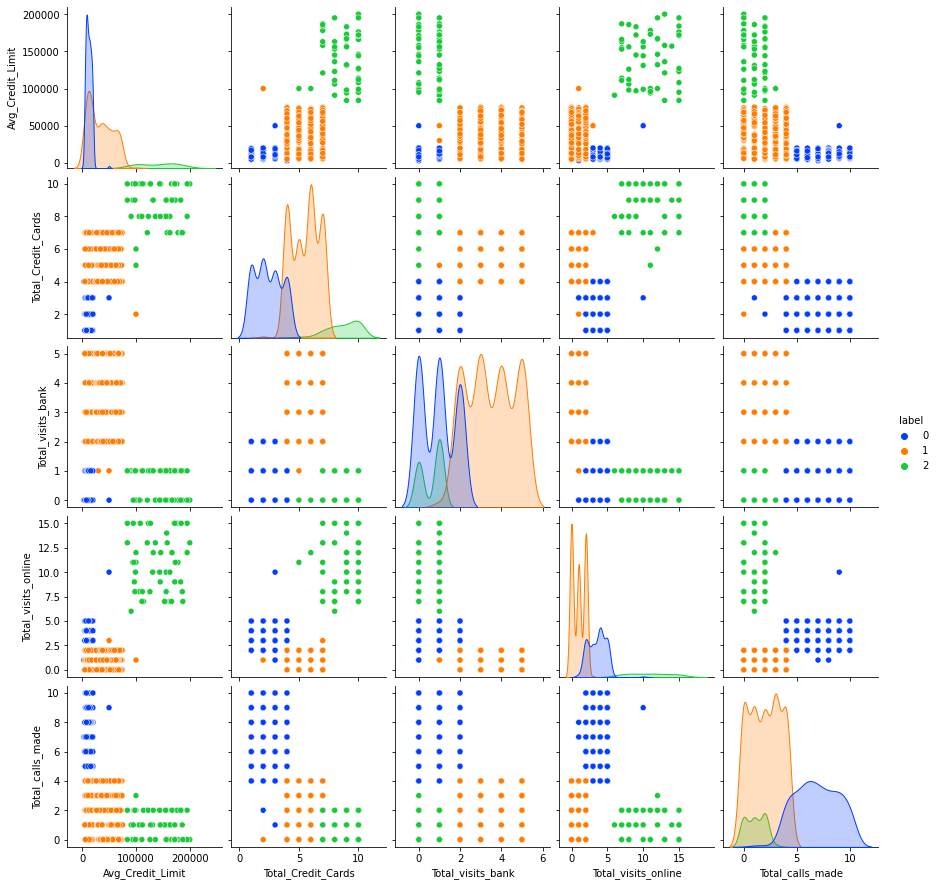

In [197]:
sns.pairplot(data,hue='label',palette='bright')

9. Print Co-ordinates of all centroids and silhouette scores for the final model


In [198]:
center=km1.cluster_centers_# centre of clustering
center

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [199]:
Kmean_silihoute=silhouette_score(scaled_data,km1.labels_)
Kmean_silihoute

0.5157182558881063

# Problem Statement 4:
 Write a Python program that reads the Groceries data.csv (provided on
LMS) file into a DataFrame. The following are the tasks that need to be taken into consideration
while constructing the solution to using the apriori algorithm and list out items that are sold
most frequently with other items. Dataset file contains tabular data, where it has items, date,
member number, day of the month, day of the week, etc.
Tasks to be performed:
1. Install mlxtend library for further process
2. Load the Groceries data.csv data into a Data frame
3. Print customer data where the member number is 1001
4. Create a new column as “item count”, and give the count as 1(because all customers
bought 1 item on each day only)
5. Drop unnecessary columns like "month","day","year","day_of_week"
6. Create a new data frame where all data is grouped by member id and items they bought
and set their value as item count.
7. Use the Apriori algorithm and generate frequent itemsets that have the support of at
least 7%
8. Generating the rules with their corresponding support, confidence, and lift
9. Filtering out the values with lift > = 1 and confidence > = 0.5

2.Load the Groceries data.csv data into a Data frame.


In [200]:
!wget https://www.dropbox.com/s/kw8v7hjnsdiwrm2/Groceries%20data.csv

--2022-07-24 18:13:09--  https://www.dropbox.com/s/kw8v7hjnsdiwrm2/Groceries%20data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kw8v7hjnsdiwrm2/Groceries%20data.csv [following]
--2022-07-24 18:13:09--  https://www.dropbox.com/s/raw/kw8v7hjnsdiwrm2/Groceries%20data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc423991c62de8275547be367c97.dl.dropboxusercontent.com/cd/0/inline/Bpu_GZiUe38_WwlFzwp-yW3St4wyAHLlKDDOm4Dt7DVOHQmrh-Ej8NZijAqHax0eSU38fcOcpthYvlO3b6OhYrUCb09CsAoh1vVHV1GmNQ8-Kbpf5lwhicpCoHPd1qa---gV9h72c7HVEBr7OfdJI1eKQT0MOWzxiKwvVU8jq0YjnA/file# [following]
--2022-07-24 18:13:09--  https://uc423991c62de8275547be367c97.dl.dropboxusercontent.com/cd/0/inline/Bpu_GZiUe38_WwlFzwp-yW3St4wyAHLlKDDOm4Dt7D

1.Install mlxtend library for further process

In [201]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
grocer=pd.read_csv("Groceries data.csv")
grocer.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


3.Print customer data where the member number is 1001.

In [203]:
grocer[grocer['Member_number']==1001]

,Member_number,Date,itemDescription,year,month,day,day_of_week
364,1001,2015-01-20,frankfurter,2015,1,20,1
5695,1001,2015-02-05,frankfurter,2015,2,5,3
6612,1001,2015-04-14,beef,2015,4,14,1
9391,1001,2014-07-02,sausage,2014,7,2,2
11046,1001,2014-12-12,whole milk,2014,12,12,4
16513,1001,2015-01-20,soda,2015,1,20,1
21844,1001,2015-02-05,curd,2015,2,5,3
22761,1001,2015-04-14,white bread,2015,4,14,1
25540,1001,2014-07-02,whole milk,2014,7,2,2
27195,1001,2014-12-12,soda,2014,12,12,4


4.Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only).

In [204]:
lst=[]
for i in grocer.itemDescription:
  lst.append(1)
lst
grocer["item count"]=lst
grocer

,Member_number,Date,itemDescription,year,month,day,day_of_week,item count
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,1
38761,2022,2014-02-23,candy,2014,2,23,6,1
38762,1097,2014-04-16,cake bar,2014,4,16,2,1
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,1


5.Drop unnecessary columns like "month","day","year","day_of_week".

In [205]:
grocer1=grocer.drop(columns=["year","month","day","day_of_week"])
grocer1

,Member_number,Date,itemDescription,item count
0,1808,2015-07-21,tropical fruit,1
1,2552,2015-05-01,whole milk,1
2,2300,2015-09-19,pip fruit,1
3,1187,2015-12-12,other vegetables,1
4,3037,2015-01-02,whole milk,1
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,1
38761,2022,2014-02-23,candy,1
38762,1097,2014-04-16,cake bar,1
38763,1510,2014-03-12,fruit/vegetable juice,1


6.Create a new data frame where all data is grouped by member id and items they bought and set their value as item count.

In [206]:
gk=grocer1.groupby(['Member_number','itemDescription']).count().unstack().fillna(0)
gk

Date                            \
itemDescription Instant food products UHT-milk abrasive cleaner   
Member_number                                                     
1000                              0.0      0.0              0.0   
1001                              0.0      0.0              0.0   
1002                              0.0      0.0              0.0   
1003                              0.0      0.0              0.0   
1004                              0.0      0.0              0.0   
...                               ...      ...              ...   
4996                              0.0      0.0              0.0   
4997                              0.0      0.0              0.0   
4998                              0.0      0.0              0.0   
4999                              0.0      0.0              0.0   
5000                              0.0      0.0              0.0   

                                                                    \
itemDescription artif. sweetener baby cosmetics bags baking powder   
Member_number                                                        
1000                         0.0            0.0  0.0           0.0   
1001                         0.0            0.0  0.0           0.0   
1002                         0.0            0.0  0.0           0.0   
1003                         0.0            0.0  0.0           0.0   
1004                         0.0            0.0  0.0           0.0   
...                          ...            ...  ...           ...   
4996                         0.0            0.0  0.0           0.0   
4997                         0.0            0.0  0.0           0.0   
4998                         0.0            0.0  0.0           0.0   
4999                         0.0            0.0  0.0           0.0   
5000                         0.0            0.0  0.0           0.0   

                                               ... item count                  \
itemDescription bathroom cleaner beef berries  ...     turkey vinegar waffles   
Member_number                                  ...                              
1000                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
1001                         0.0  1.0     0.0  ...        0.0     0.0     0.0   
1002                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
1003                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
1004                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
...                          ...  ...     ...  ...        ...     ...     ...   
4996                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
4997                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
4998                         0.0  0.0     0.0  ...        0.0     0.0     0.0   
4999                         0.0  0.0     2.0  ...        0.0     0.0     0.0   
5000                         0.0  0.0     0.0  ...        0.0     0.0     0.0   

                                                                             \
itemDescription whipped/sour cream whisky white bread white wine whole milk   
Member_number                                                                 
1000                           0.0    0.0         0.0        0.0        2.0   
1001                           1.0    0.0         1.0        0.0        2.0   
1002                           0.0    0.0         0.0        0.0        1.0   
1003                           0.0    0.0         0.0        0.0        0.0   
1004                           0.0    0.0         0.0        0.0        3.0   
...                            ...    ...         ...        ...        ...   
4996                           0.0    0.0         0.0        0.0        0.0   
4997                           0.0    0.0         0.0        1.0        1.0   
4998                           0.0    0.0         0.0        0.0        0.0   
4999                          

In [207]:
from mlxtend.preprocessing import TransactionEncoder
one_hot_encoding = TransactionEncoder()

one_hot_txns = one_hot_encoding.fit(gk).transform(gk)

In [208]:
one_hot_txns

array([[ True,  True, False, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [209]:
one_hot_txns = one_hot_txns.astype('int')
one_hot_txns

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [210]:
one_hot_txns_df = pd.DataFrame(one_hot_txns, columns = one_hot_encoding.columns_)
one_hot_txns_df

,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
def encode_units(x):
    if x <= 0:
        return 0    
    if x >= 1:
        return 1
gk_sets = gk.applymap(encode_units)

6.Use the Apriori algorithm and generate frequent itemsets that have the support of at
least 7%

In [212]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#Generating frequent item sets that have a support of at least 7%
frequent_itemsets = apriori(gk_sets, min_support=0.07, use_colnames=True)

8.Generating the rules with their corresponding support, confidence, and lift

In [213]:
#Generating the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Date, UHT-milk))","((item count, UHT-milk))",0.078502,0.078502,0.078502,1.000000,12.738562,0.072339,inf
1,"((item count, UHT-milk))","((Date, UHT-milk))",0.078502,0.078502,0.078502,1.000000,12.738562,0.072339,inf
2,"((item count, beef))","((Date, beef))",0.119548,0.119548,0.119548,1.000000,8.364807,0.105257,inf
3,"((Date, beef))","((item count, beef))",0.119548,0.119548,0.119548,1.000000,8.364807,0.105257,inf
4,"((item count, berries))","((Date, berries))",0.079785,0.079785,0.079785,1.000000,12.533762,0.073419,inf
...,...,...,...,...,...,...,...,...,...
2965,"((Date, whole milk))","((Date, yogurt), (item count, whole milk), (it...",0.458184,0.071832,0.071832,0.156775,2.182531,0.038920,1.100736
2966,"((item count, whole milk))","((Date, yogurt), (Date, whole milk), (item cou...",0.458184,0.071832,0.071832,0.156775,2.182531,0.038920,1.100736
2967,"((item count, other vegetables))","((Date, yogurt), (Date, whole milk), (item cou...",0.376603,0.071832,0.071832,0.190736,2.655313,0.044780,1.146928
2968,"((item count, yogurt))","((Date, yogurt), (Date, whole milk), (item cou...",0.282966,0.071832,0.071832,0.253853,3.533998,0.051506,1.243949


9.Filtering out the values with lift > = 1 and confidence > = 0.5

In [214]:
new_rules=rules[(rules["lift"]>=1) & (rules["confidence"]>=0.5)]
new_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Date, UHT-milk))","((item count, UHT-milk))",0.078502,0.078502,0.078502,1.0,12.738562,0.072339,inf
1,"((item count, UHT-milk))","((Date, UHT-milk))",0.078502,0.078502,0.078502,1.0,12.738562,0.072339,inf
2,"((item count, beef))","((Date, beef))",0.119548,0.119548,0.119548,1.0,8.364807,0.105257,inf
3,"((Date, beef))","((item count, beef))",0.119548,0.119548,0.119548,1.0,8.364807,0.105257,inf
4,"((item count, berries))","((Date, berries))",0.079785,0.079785,0.079785,1.0,12.533762,0.073419,inf
